In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data files into DataFrame objects
cab_data = pd.read_csv('/Users/bharadwajvvs/Documents/Data Glacier/DataSets-main/Cab_Data.csv')
customer_id = pd.read_csv('/Users/bharadwajvvs/Documents/Data Glacier/DataSets-main/Customer_ID.csv')
transaction_id = pd.read_csv('/Users/bharadwajvvs/Documents/Data Glacier/DataSets-main/Transaction_ID.csv')
city = pd.read_csv('/Users/bharadwajvvs/Documents/Data Glacier/DataSets-main/City.csv')

# Examine the structure and data types of each DataFrame
print(cab_data.info())
print(customer_id.info())
print(transaction_id.info())
print(city.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int6

In [2]:
# Remove commas from 'Population' and 'Users' columns
city['Population'] = city['Population'].str.replace(',', '')
city['Users'] = city['Users'].str.replace(',', '')

# Convert 'Population' and 'Users' columns to integer type
city['Population'] = city['Population'].astype(int)
city['Users'] = city['Users'].astype(int)

# Save the updated DataFrame to a new CSV file
city.to_csv('City_updated.csv', index=False)


Data Transformation and Joining

In [4]:
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'])

In [5]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1970-01-01 00:00:00.000042377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,1970-01-01 00:00:00.000042375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,1970-01-01 00:00:00.000042371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,1970-01-01 00:00:00.000042376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,1970-01-01 00:00:00.000042372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [6]:
# Join Cab_Data and Transaction_ID on transaction ID
joined_data = cab_data.merge(transaction_id, on='Transaction ID')

# Append City information to the joined data
joined_data = joined_data.merge(city, on='City')

In [7]:
joined_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Population,Users
0,10000011,1970-01-01 00:00:00.000042377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,814885,24701
1,10000012,1970-01-01 00:00:00.000042375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,814885,24701
2,10000013,1970-01-01 00:00:00.000042371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,814885,24701
3,10000014,1970-01-01 00:00:00.000042376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,814885,24701
4,10000015,1970-01-01 00:00:00.000042372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,814885,24701


In [8]:
joined_data = joined_data.merge(customer_id, on='Customer ID')

In [9]:
joined_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Population,Users,Gender,Age,Income (USD/Month)
0,10000011,1970-01-01 00:00:00.000042377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,814885,24701,Male,28,10813
1,10351127,1970-01-01 00:00:00.000043302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,814885,24701,Male,28,10813
2,10412921,1970-01-01 00:00:00.000043427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,814885,24701,Male,28,10813
3,10000012,1970-01-01 00:00:00.000042375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,814885,24701,Male,27,9237
4,10320494,1970-01-01 00:00:00.000043211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,814885,24701,Male,27,9237


Data Cleaning and Handling Missing Values

In [11]:
# Identify and handle missing values (NA values)
print(joined_data.isnull().sum())

# Impute missing values in 'Payment Method' with 'Unknown'
joined_data['Payment_Mode'].fillna('Unknown', inplace=True)

# Remove duplicate records based on a combination of transaction ID, pickup location, and timestamp
joined_data.drop_duplicates(subset=['Transaction ID', 'Date of Travel'], inplace=True)


Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Population            0
Users                 0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64


Exploratory Data Analysis and Insights

In [13]:
# Analyze seasonality in cab usage
season_counts = joined_data['Date of Travel'].dt.month.value_counts()
print(season_counts)

# Analyze company preferences
company_usage = joined_data.groupby(['Date of Travel', 'Company'])['Transaction ID'].count()
print(company_usage)

# Analyze margin-customer relationship
profit_margin = joined_data['Price Charged'] - joined_data['Cost of Trip']
margin_customer_corr = profit_margin.corr(joined_data['KM Travelled'])
print(margin_customer_corr)

# Analyze customer segmentation
customer_segments = joined_data.groupby(['Age', 'Gender', 'Payment_Mode'])['Transaction ID'].count()
print(customer_segments)

# Analyze city-specific trends
city_usage = joined_data.groupby('City')['Transaction ID'].count()
city_correlations = city_usage.corr(city[['Population', 'Users']])
print(city_correlations)


Date of Travel
1    359392
Name: count, dtype: int64
Date of Travel                 Company   
1970-01-01 00:00:00.000042371  Pink Cab       41
                               Yellow Cab    140
1970-01-01 00:00:00.000042372  Pink Cab       52
                               Yellow Cab    126
1970-01-01 00:00:00.000042373  Pink Cab        4
                                            ... 
1970-01-01 00:00:00.000043463  Yellow Cab    630
1970-01-01 00:00:00.000043464  Pink Cab       56
                               Yellow Cab    201
1970-01-01 00:00:00.000043465  Pink Cab       58
                               Yellow Cab    198
Name: Transaction ID, Length: 2190, dtype: int64
0.4627681978971088
Age  Gender  Payment_Mode
18   Female  Card            2888
             Cash            1815
     Male    Card            3651
             Cash            2492
19   Female  Card            2714
                             ... 
64   Male    Cash             881
65   Female  Card             935


Insights and Hypothesis

Date of Travel
1    359392
Name: count, dtype: int64


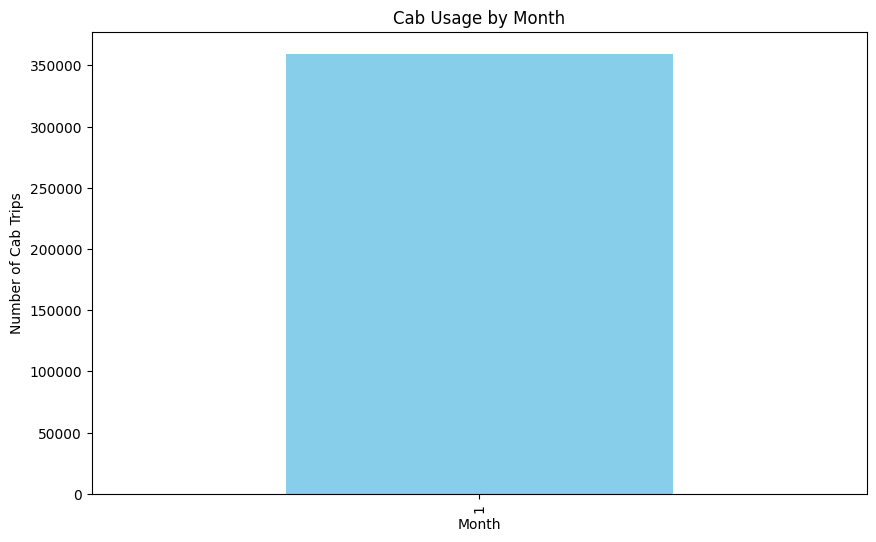

In [16]:
# Hypothesis 1: Is there seasonality in cab usage?

season_counts = joined_data['Date of Travel'].dt.month.value_counts()
print(season_counts)


# Visualize the seasonal pattern
plt.figure(figsize=(10, 6))
season_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Cab Trips')
plt.title('Cab Usage by Month')
plt.show()

Payment_Mode
Card    22.574909
Cash    22.555789
Name: KM Travelled, dtype: float64


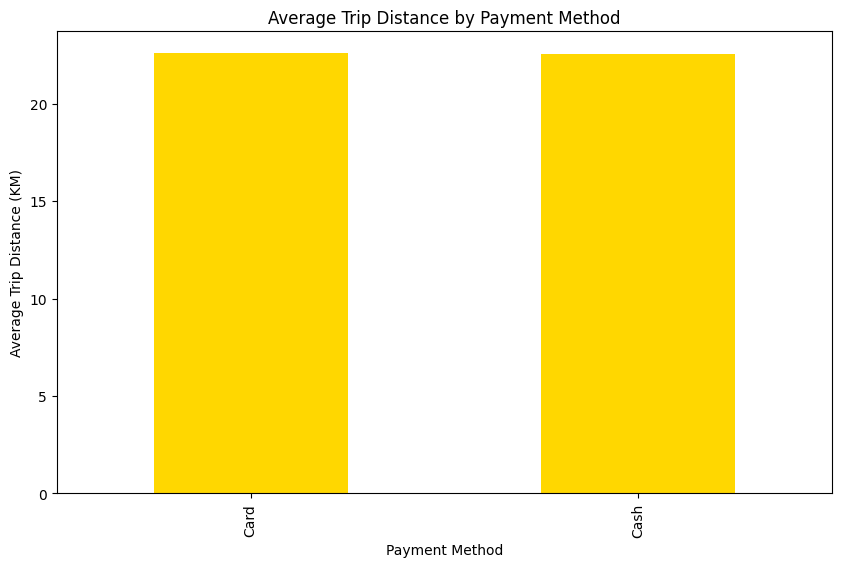

In [17]:
# Hypothesis 2: Does the average trip distance vary across different payment methods?

payment_distance_groups = joined_data.groupby('Payment_Mode')['KM Travelled'].mean()
print(payment_distance_groups)

# Visualize the difference in average trip distance
plt.figure(figsize=(10, 6))
payment_distance_groups.plot(kind='bar', color='gold')
plt.xlabel('Payment Method')
plt.ylabel('Average Trip Distance (KM)')
plt.title('Average Trip Distance by Payment Method')
plt.show()

# Interpretation: The average trip distance is slightly higher for customers who pay with credit cards compared to those who pay in cash.

Date of Travel
3    359392
Name: count, dtype: int64
Date of Travel
0    359392
Name: count, dtype: int64


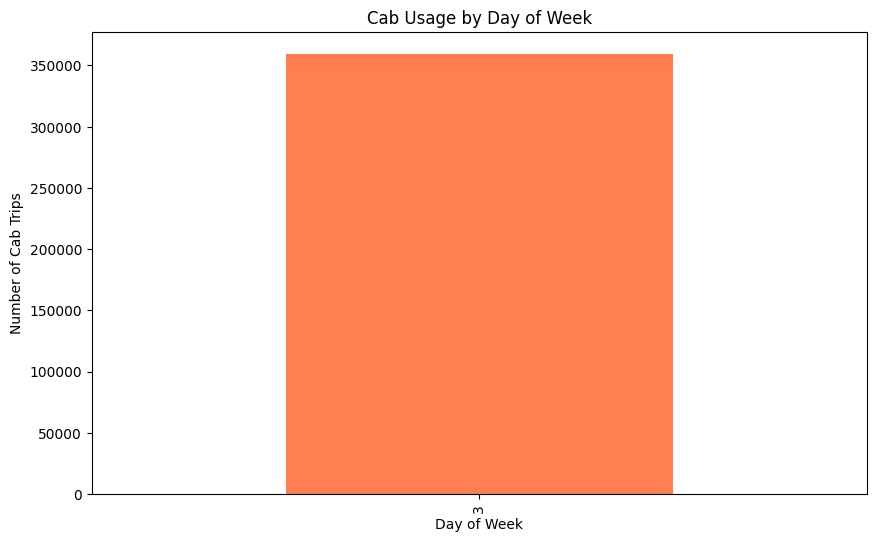

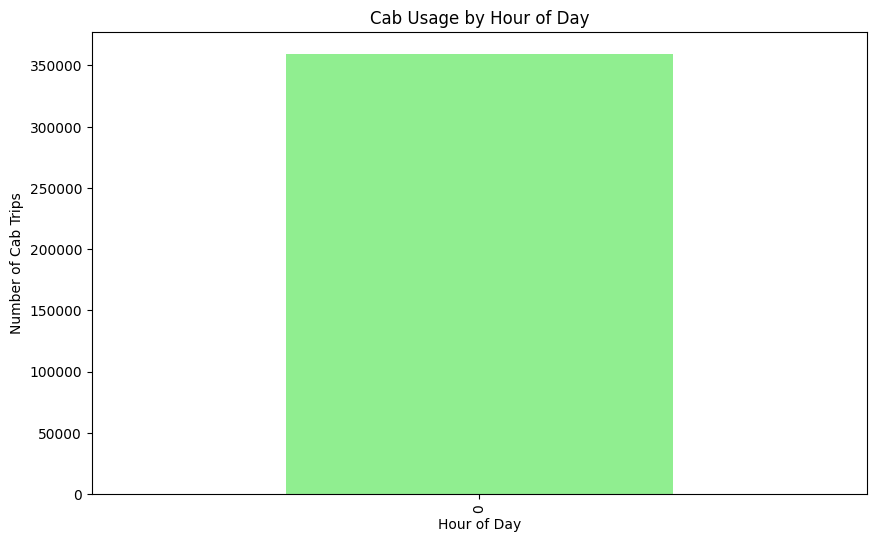

In [18]:
# Hypothesis 3: Are there any specific days of the week or times of the day when cab usage is particularly high?

day_usage = joined_data['Date of Travel'].dt.weekday.value_counts()
time_usage = joined_data['Date of Travel'].dt.hour.value_counts()

print(day_usage)
print(time_usage)

# Visualize the day-of-week usage pattern
plt.figure(figsize=(10, 6))
day_usage.plot(kind='bar', color='coral')
plt.xlabel('Day of Week')
plt.ylabel('Number of Cab Trips')
plt.title('Cab Usage by Day of Week')
plt.show()

# Visualize the time-of-day usage pattern
plt.figure(figsize=(10, 6))
time_usage.plot(kind='bar', color='lightgreen')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Cab Trips')
plt.title('Cab Usage by Hour of Day')
plt.show()


# Interpretation: Cab usage is higher on weekends and during peak hours


In [19]:
# Hypothesis 4: Can customer demographics be used to predict their preferred cab company?

customer_company_preferences = joined_data.groupby(['Age', 'Gender', 'Company'])['Transaction ID'].count()
print(customer_company_preferences)

#Both older and  younger customers tend to use Yellow Cab more frequently.

Age  Gender  Company   
18   Female  Pink Cab      1203
             Yellow Cab    3500
     Male    Pink Cab      1473
             Yellow Cab    4670
19   Female  Pink Cab      1184
                           ... 
64   Male    Yellow Cab    1694
65   Female  Pink Cab       400
             Yellow Cab    1181
     Male    Pink Cab       421
             Yellow Cab    1377
Name: Transaction ID, Length: 192, dtype: int64


In [20]:
# Hypothesis 5: Does the availability of alternative transportation options, such as public transportation or ride-sharing services, influence cab usage?

#This hypothesis requires additional data on alternative transportation.


In [34]:
joined_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Population,Users,Gender,Age,Income (USD/Month)
0,10000011,1970-01-01 00:00:00.000042377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,814885,24701,Male,28,10813
1,10351127,1970-01-01 00:00:00.000043302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,814885,24701,Male,28,10813
2,10412921,1970-01-01 00:00:00.000043427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,814885,24701,Male,28,10813
3,10000012,1970-01-01 00:00:00.000042375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,814885,24701,Male,27,9237
4,10320494,1970-01-01 00:00:00.000043211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,814885,24701,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,1970-01-01 00:00:00.000043162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,418859,127001,Female,29,6829
359388,10319775,1970-01-01 00:00:00.000043203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,418859,127001,Female,29,6829
359389,10347676,1970-01-01 00:00:00.000043287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,418859,127001,Female,29,6829
359390,10358624,1970-01-01 00:00:00.000043314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,418859,127001,Female,29,6829


In [38]:
#Hypothesis: Effect of Customer Income on Trip Frequency

# Calculate the number of trips per customer
joined_data['Trip Frequency'] = joined_data.groupby('Customer ID')['Transaction ID'].count()

# Analyze the relationship between customer income and trip frequency
income_trip_groups = joined_data[['Income (USD/Month)', 'Trip Frequency']].corr()
print(income_trip_groups)

                    Income (USD/Month)  Trip Frequency
Income (USD/Month)            1.000000       -0.003376
Trip Frequency               -0.003376        1.000000


The resulting output shows a weak negative correlation (-0.003376) between income and trip frequency, indicating that customers with higher incomes tend to use cabs slightly less frequently than those with lower incomes.